# Initialization

如果你完成了这个专业化的前一个课程，你可能按照我们的指导进行了权重初始化，并且到目前为止它已经成功了。但是，面对一个新的神经网络你究竟怎么选择初始化？在这个笔记中，你会看到不同的初始化会带来不同的结果。

精心选择的初始化可以：

- 加快梯度下降的收敛
- 增加梯度下降收敛到较低的训练（和泛化）错误的几率

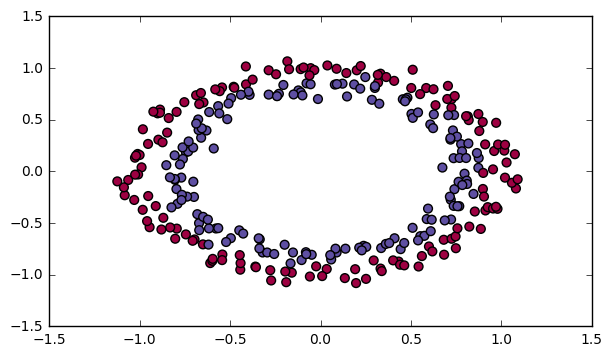

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

You would like a classifier to separate the blue dots from the red dots.

你需要一个分类器去区分蓝点和红点

## 1 - Neural Network model 

您将使用一个我们早已提供给你的3层神经网络。以下是您将要实验的初始化方法：
- *Zeros initialization* --  setting `initialization = "zeros"` in the input argument.
- *Random initialization* -- setting `initialization = "random"` in the input argument. This initializes the weights to large random values.  
- *He initialization* -- setting `initialization = "he"` in the input argument. This initializes the weights to random values scaled according to a paper by He et al., 2015. 

**Instructions**: 请快速阅读下面的代码，并运行它。在下一部分中，您将实现这个model()调用的三个初始化方法

In [5]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## 2 - Zero initialization

在神经网络中有两种类型的参数需要去初始化：
- the weight matrices $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- the bias vectors $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

**Exercise**: 执行以下函数将所有参数初始化为零。稍后你会看到，它的效果并不好，因为它不能破坏模型的对称性。但我们还是去尝试一下，看看到底发生了什么. Use np.zeros((..,..)) with the correct shapes.

In [10]:
# GRADED FUNCTION: initialize_parameters_zeros 

def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = 0
        ### END CODE HERE ###
    return parameters

In [11]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.  0.  0.]
 [ 0.  0.  0.]]
b1 = 0
W2 = [[ 0.  0.]]
b2 = 0


**Expected Output**:

<table> 
    <tr>
    <td>
    **W1**
    </td>
        <td>
    [[ 0.  0.  0.]
 [ 0.  0.  0.]]
    </td>
    </tr>
    <tr>
    <td>
    **b1**
    </td>
        <td>
    [[ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    **W2**
    </td>
        <td>
    [[ 0.  0.]]
    </td>
    </tr>
    <tr>
    <td>
    **b2**
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

运行下面的代码，使用零初始化将你的模型迭代15,000次.

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


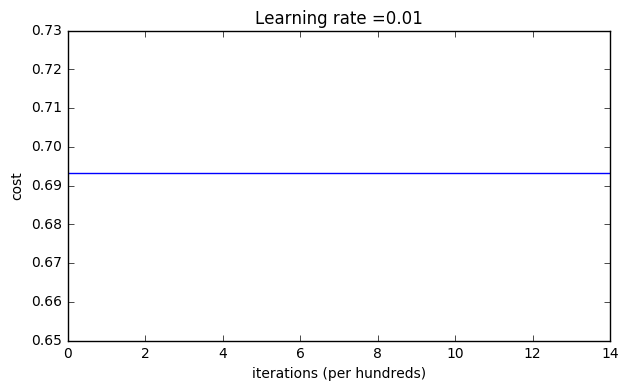

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [12]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

性能非常糟糕，cost 并没有真正降低，算法也没有比随机猜测更好。为什么？让我们看看预测和决策边界的细节：

In [13]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


D:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


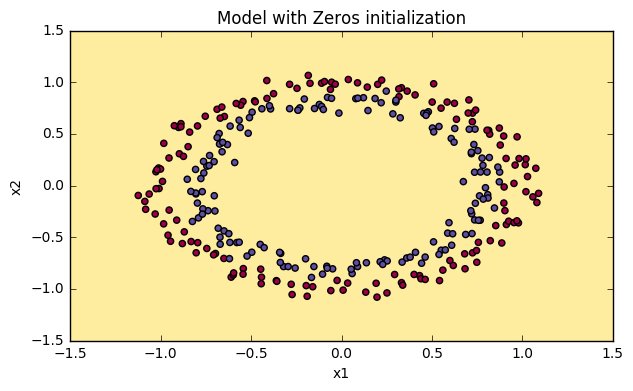

In [14]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

模型将每个样例都预测为了0.

一般来说，将所有权重初始化为零将导致网络无法破坏对称性。这意味着每一层的每个神经元都会学到相同的东西, and you might as well be training a neural network with $n^{[l]}=1$ for every layer, 网络并不比线性分类器如逻辑回归更强大. 

<font color='blue'>
**你应该记住的是：**
- 应该随机初始化权重 $W^{[l]}$ 去破坏网络的对称性。
- 但是偏置 $b^{[l]}$ 仍然可以初始化为0。因为只要权重 $W^{[l]}$ 被随机初始化，对称性就已经被打破了。


## 3 - Random initialization

为了打破对称，需要随机初始化权重。随机初始化后，每个神经元可以继续学习其输入的不同功能。在这个练习中，你会看到如果权重被初始化为很大的值将会发生什么。

**Exercise**: 执行以下函数，将权重初始化为较大的随机值(scaled by \*10) and your biases to zeros. Use `np.random.randn(..,..) * 10` for weights and `np.zeros((.., ..))` for biases. 我们使用一个固定的 `np.random.seed(..)` 以确保您的“随机”权重和我们的相匹配。所以不用担心，无论你运行多少次，你得到的始终是相同的参数初始值。

In [15]:
# GRADED FUNCTION: initialize_parameters_random

def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        ### END CODE HERE ###

    return parameters

In [16]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[ 0.]]


**Expected Output**:

<table> 
    <tr>
    <td>
    **W1**
    </td>
        <td>
    [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
    </td>
    </tr>
    <tr>
    <td>
    **b1**
    </td>
        <td>
    [[ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    **W2**
    </td>
        <td>
    [[-0.82741481 -6.27000677]]
    </td>
    </tr>
    <tr>
    <td>
    **b2**
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

Run the following code to train your model on 15,000 iterations using random initialization.

F:\git_pro\machine_learning_python_code\吴恩达-深度学习-课后作业-答案-总结\2_改善深层神经网络：超参数调试、正则化以及优化\Week1 深层学习的实用\assignment1\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
F:\git_pro\machine_learning_python_code\吴恩达-深度学习-课后作业-答案-总结\2_改善深层神经网络：超参数调试、正则化以及优化\Week1 深层学习的实用\assignment1\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6239567039908781
Cost after iteration 2000: 0.5978043872838292
Cost after iteration 3000: 0.563595830364618
Cost after iteration 4000: 0.5500816882570866
Cost after iteration 5000: 0.5443417928662615
Cost after iteration 6000: 0.5373553777823036
Cost after iteration 7000: 0.4700141958024487
Cost after iteration 8000: 0.3976617665785177
Cost after iteration 9000: 0.39344405717719166
Cost after iteration 10000: 0.39201765232720626
Cost after iteration 11000: 0.38910685278803786
Cost after iteration 12000: 0.38612995897697244
Cost after iteration 13000: 0.3849735792031832
Cost after iteration 14000: 0.38275100578285265


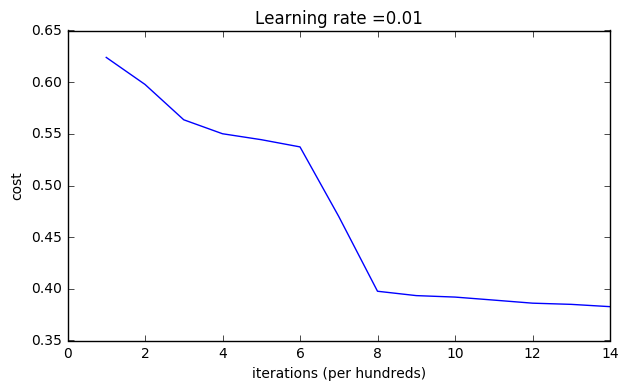

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [17]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

If you see "inf" as the cost after the iteration 0, this is because of numerical roundoff（这是因为数值舍入）; 一个更复杂的实现可以解决这个问题，但这和我们的目的相关不大所以无需理会。

不管怎样，模型看起来已经失去了对称性，它给出了更好的结果。相比以前，它不会输出全0。

In [18]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1
  1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0
  0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1
  1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0
  1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
  0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1
  0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1
  1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1
  1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1
  1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


D:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


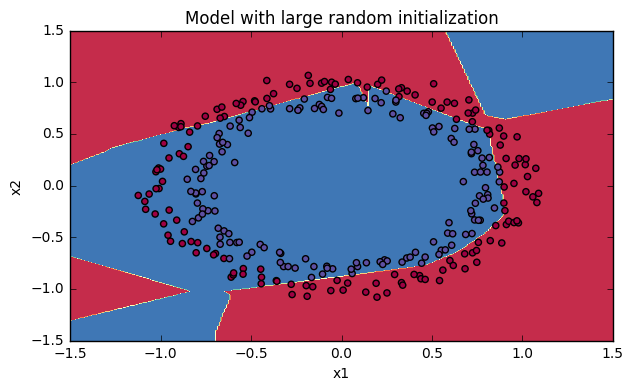

In [19]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observations**:
- The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that are very close to 0 or 1 for some examples, and when it gets that example wrong it incurs a very high loss for that example. Indeed, when $\log(a^{[3]}) = \log(0)$, the loss goes to infinity.
- 较差的初始化会导致 vanishing/exploding gradients, 这也会减慢优化算法的速度. 
- 如果你花更长时间去训练这个网络，你会看到更好的结果，但是用过大的随机数初始化会减慢优化速度

<font color='blue'>
**总结**:
- 将权重初始化为非常大的随机值效果不佳. 
- 用较小的随机值初始化效果可能会更好。但问题是随机值应该小到什么程度？让我们来看下一部分内容！

## 4 - He initialization

Finally, try "He Initialization"; this is named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` where He initialization would use `sqrt(2./layers_dims[l-1])`.)

**Exercise**: 执行以下函数，用 “He initialization”去初始化你的参数

**Hint**: 该功能与上一个 `initialize_parameters_random(...)`类似. 唯一的区别是，不是用 `np.random.randn(..,..)`去乘以10, 而是去乘以 $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$ which is what He initialization recommends for layers with a ReLU activation. 

In [20]:
# GRADED FUNCTION: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        ### END CODE HERE ###
        
    return parameters

In [21]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[ 0.]]


**Expected Output**:

<table> 
    <tr>
    <td>
    **W1**
    </td>
        <td>
    [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
    </td>
    </tr>
    <tr>
    <td>
    **b1**
    </td>
        <td>
    [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    **W2**
    </td>
        <td>
    [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
    </td>
    </tr>
    <tr>
    <td>
    **b2**
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

Run the following code to train your model on 15,000 iterations using He initialization.

Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071794
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322562
Cost after iteration 9000: 0.18597287209206836
Cost after iteration 10000: 0.15015556280371817
Cost after iteration 11000: 0.12325079292273552
Cost after iteration 12000: 0.09917746546525932
Cost after iteration 13000: 0.08457055954024274
Cost after iteration 14000: 0.07357895962677362


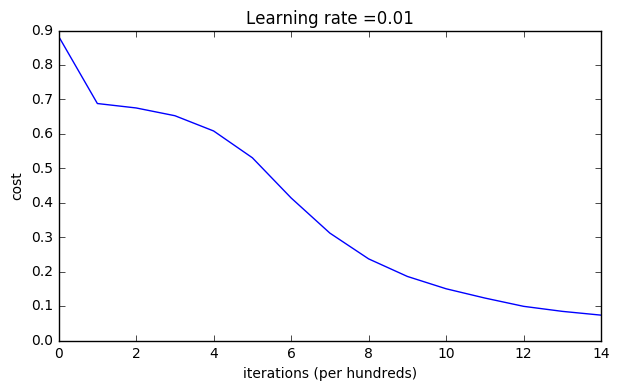

On the train set:
Accuracy: 0.993333333333
On the test set:
Accuracy: 0.96


In [22]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

D:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


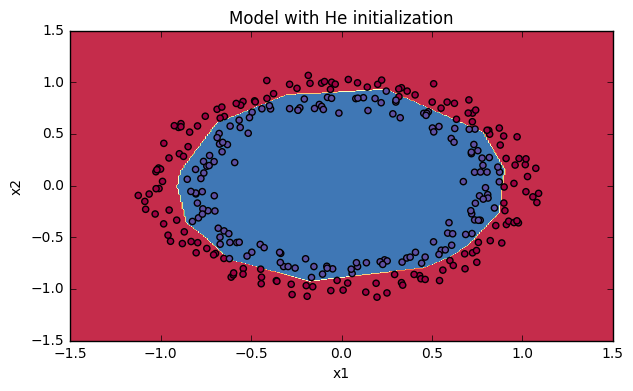

In [23]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observations**:
- The model with He initialization separates the blue and the red dots very well in a small number of iterations.


**观察：**
- "He initialization"的模型在较少的迭代中很好地分离了蓝色和红色的点

## 5 - Conclusions

你已经看到了三种不同类型的初始化. For the same number of iterations and same hyperparameters the comparison is:

<table> 
    <tr>
        <td>
        **Model**
        </td>
        <td>
        **Train accuracy**
        </td>
        <td>
        **Problem/Comment**
        </td>

    </tr>
        <td>
        3-layer NN with zeros initialization
        </td>
        <td>
        50%
        </td>
        <td>
        fails to break symmetry
        </td>
    <tr>
        <td>
        3-layer NN with large random initialization
        </td>
        <td>
        83%
        </td>
        <td>
        too large weights 
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with He initialization
        </td>
        <td>
        99%
        </td>
        <td>
        recommended method
        </td>
    </tr>
</table> 

<font color='blue'>
从本次练习中你应该了解：

- 不同的初始化导致不同的结果
- 随机初始化用于破坏对称性，并确保不同的隐藏单元可以学习不同的东西
- 不要初始化太大的值
- "He initialization"适用于ReLU激活的网络
